In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

##  Exercise 7.1: CFAR

In [2]:
@jit(nopython=True, cache=True)
def cfar_thresh_lvl(s, N_w=3, Pfa=1e-4, N_g=0, mode='CA'):
    """
    Calculates the threshold level for a signal x with a CFAR
    method given by mode, by looping over all cells.
    Parameters
    ----------
    s : array
        Array of positive (absolute values) of floats
    N_w : int
        One-sided width of the window.
    Pfa : float, optional
        False alarm rate. Default: 1e-4
    N_g : int, optional
        One sided number of guard cells. Default: no guard cells
    mode : string, optional
        'CA' or None for cell average, 'CAGO' for CA-greatest of
    Returns
    -------
    array of size of x holding threshold levels.
    """
    # for homework 7.1:
    if mode is None:
        mode = 'CA'
    
    x = []
    
    L = 2 * N_w
    alpha = np.sqrt(4/np.pi*L*  (Pfa**(-1/L)-1) *   (1-(1-np.pi/4)*np.exp(1-L)   )   )
    
    
    plus_ind = N_g+N_w
    
    for curr_ind,slid_window in enumerate(s):
        if curr_ind-plus_ind>=0 and curr_ind+plus_ind<=len(s)-1:
            range1_min = curr_ind-plus_ind
            range1_max = curr_ind-N_g-1
            window1 = s[range1_min:range1_max+1]
            sum_window1 = sum(window1)

            range2_min = curr_ind+N_g+1
            range2_max = curr_ind+plus_ind
            window2 = s[range2_min:range2_max+1]
            sum_window2 = sum(window2)

            if mode=='CAGO':
                box = 2*max(sum_window1, sum_window2)/L
            else:
                box = (sum_window1 + sum_window2)/L

            T = alpha * box
            Z = slid_window > T

            x.append(T)
    return x

## Exercise 7.2: Test CFAR 

In [3]:
s=np.concatenate((np.random.randn(100),5*np.random.randn(40)))
s=np.abs(s) # Rayleigh distributed
s[[32,56,75,77,83,112]]=[7,4,12,8,10,10] # setting multiple elements
Pfa=1e-2 # probability of false-alarm
N_w=12   # single-sided width of the window
N_g=1    # single-sided number of guard cells

In [4]:
x_ca = cfar_thresh_lvl(s, N_w=N_w, Pfa=Pfa, N_g=N_g, mode='CA')
x_cago = cfar_thresh_lvl(s, N_w=N_w, Pfa=Pfa, N_g=N_g, mode='CAGO')
len(x_ca),len(x_cago),len(s)
indexer = int((len(s)-len(x_ca))/2)
windowed_s = s[indexer:-indexer]

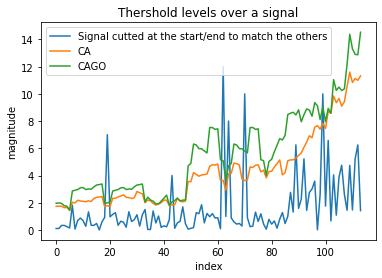

In [5]:
plt.figure()
plt.plot(windowed_s, label='Signal cutted at the start/end to match the others')
plt.plot(x_ca, label='CA')
plt.plot(x_cago, label='CAGO')

plt.title('Thershold levels over a signal')
plt.xlabel('index')
plt.ylabel('magnitude')
plt.legend()
plt.show()

## Homework 7.1: Numba

Adding decorator, see function above

In [6]:
%timeit cfar_thresh_lvl(s, N_w=N_w, Pfa=Pfa)

17.6 µs ± 5.26 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
